In [31]:
import pandas as pd
import json
import pickle
import csv
import os
import matplotlib.pyplot as plt
import re
import datetime
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
from sklearn.model_selection import train_test_split

In [3]:
pip install spacy

     |████████████████████████████████| 6.1MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 112kB 40.7MB/s eta 0:00:01
     |████████████████████████████████| 604kB 37.6MB/s eta 0:00:01
     |████████████████████████████████| 450kB 31.6MB/s eta 0:00:01
     |████████████████████████████████| 184kB 32.9MB/s eta 0:00:01
     |████████████████████████████████| 2.6MB 41.8MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 102kB 15.0MB/s ta 0:00:01
  Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:


In [3]:
pip install textblob

     |████████████████████████████████| 645kB 1.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import flair
import seaborn as sns 

In [33]:
from flair.data import Sentence
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import ClassificationCorpus,CSVClassificationCorpus

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

ValueError: Value must have type '<class 'int'>'

In [35]:
data = pd.read_excel('data.xlsx')
data

,Unnamed: 0,Input.amt,clean_text,text_base,label.flair
0,0,"#Reuters Article First Published on June 6, 2...","#reuters article first published on june 6, 20...","# reuters article first publish on june 6 , 20...",No
1,1,Hiring: #PACAF Stan/Eval Support – 16469\nLoc...,hiring: #pacaf stan/eval support – 16469\nloca...,hire : # pacaf stan / eval support – 16469 \n ...,No
2,2,Hiring: #PACAF Stan/Eval Support – 16469\nLoc...,hiring: #pacaf stan/eval support – 16469\nloca...,hire : # pacaf stan / eval support – 16469 \n ...,No
3,3,New #WallSt Article \n\nCBS Falls on Report ...,new #wallst article \n\ncbs falls on report o...,new # wallst article \n\n cbs fall on report ...,Yes
4,4,PSA \n\nAfter an extensive investigation I ha...,psa \n\nafter an extensive investigation i hav...,psa \n\n after an extensive investigation i ha...,No
5,5,"""#Walmart Pulls Controversial '#Impeach45' #Cl...","""#walmart pulls controversial '#impeach45' #cl...",""" # walmart pull controversial ' # impeach45 '...",No
6,6,"""As George Washington's Mount Vernon will figh...","""as george washington's mount vernon will figh...",""" as george washington 's mount vernon will fi...",No
7,7,"""Dominion Energy, the Virginia-­based power co...","""dominion energy, the virginia-­based power co...",""" dominion energy , the virginia-­based power ...",No
8,8,"""George Washington’s @MountVernon cannot be mo...","""george washington’s @mountvernon cannot be mo...",""" george washington ’s @mountvernon can not be...",No
9,9,"""George Washington’s @MountVernon cannot be mo...","""george washington’s @mountvernon cannot be mo...",""" george washington ’s @mountvernon can not be...",No


### 1.Try different text input: Input.amt; clean_text; text_base

In [36]:
df1 = data[['Input.amt','label.flair']] # Try different text input: Input.amt; clean_text; text_base
df1.columns  = ['text','labels']

In [37]:
train,test,dev = np.split(df1,[int(.7*len(df1)),int(.85*len(df1))])

In [38]:
!mkdir -p data

In [39]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")

In [40]:
# this is the folder in which train, test and dev files reside
data_folder = 'data/'

# column format indicating which columns hold the text and label(s)
column_name_map = {1: 'text', 2: 'labels'}

# load corpus containing training, test and dev data and if CSV has a header, you can skip it
corpus: Corpus = CSVClassificationCorpus(data_folder, column_name_map=column_name_map,
                                         skip_header = True, delimiter=',', label_type='labels'
)

2022-01-11 18:18:33,764 Reading data from data
2022-01-11 18:18:33,765 Train: data/training.png
2022-01-11 18:18:33,765 Dev: data/dev.csv
2022-01-11 18:18:33,766 Test: data/test.tsv


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [41]:
# Creating the Label Diction For CSV
label_dict_csv = corpus.make_label_dictionary(label_type = 'labels')

2022-01-11 18:18:37,499 Computing label dictionary. Progress:


100%|██████████| 5834/5834 [00:01<00:00, 3522.17it/s]

2022-01-11 18:18:39,276 Corpus contains the labels: labels (#5834)
2022-01-11 18:18:39,277 Created (for label 'labels') Dictionary with 3 tags: <unk>, No, Yes


### 2.Try different models:  FlairEmbeddings,WordEmbeddings,StackedEmbeddings,DocumentLSTMEmbeddings,DocumentRNNEmbeddings,TransformerDocumentEmbeddings,BertEmbeddings, etc. 

In [42]:
# Working with the Word Embeddings
from flair.embeddings import FlairEmbeddings,WordEmbeddings,StackedEmbeddings,DocumentLSTMEmbeddings,DocumentRNNEmbeddings
from flair.embeddings import TransformerDocumentEmbeddings
from flair.embeddings import FastTextEmbeddings,BertEmbeddings
from flair.embeddings import SentenceTransformerDocumentEmbeddings


#FastText_embedding = FastTextEmbeddings('/path/to/local/custom_fasttext_embeddings.bin')
#bert_embedding = BertEmbeddings('distilbert-base-uncased')

#word_embeddings = [WordEmbeddings('glove'),FlairEmbeddings('news-forward'),FlairEmbeddings('news-backward'),BertEmbeddings('distilbert-base-uncased')]

#document_embeddings = DocumentLSTMEmbeddings(word_embeddings,hidden_size=512,reproject_words=True,reproject_words_dimension=256)

#document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

document_embeddings = TransformerDocumentEmbeddings('bert-base-uncased', fine_tune=True)

#document_embeddings = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')

In [43]:
# Classifier with CSV dataset
clf = TextClassifier(document_embeddings,label_dictionary = label_dict_csv,label_type = 'labels')

In [44]:
# Training
# Init
trainer = ModelTrainer(clf,corpus)

### 3.Try different settings: learning rate, batch_size, and epochs, etc.

In [45]:
# Fit/Training with Dataset
trainer.train('data/',max_epochs = 10)

2022-01-11 18:20:04,056 ----------------------------------------------------------------------------------------------------
2022-01-11 18:20:04,060 Model: "TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): TransformerDocumentEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_fe

2022-01-11 18:20:04,061 ----------------------------------------------------------------------------------------------------
2022-01-11 18:20:04,063 Corpus: "Corpus: 5834 train + 1251 dev + 1250 test sentences"
2022-01-11 18:20:04,063 ----------------------------------------------------------------------------------------------------
2022-01-11 18:20:04,064 Parameters:
2022-01-11 18:20:04,065  - learning_rate: "0.1"
2022-01-11 18:20:04,066  - mini_batch_size: "32"
2022-01-11 18:20:04,066  - patience: "3"
2022-01-11 18:20:04,067  - anneal_factor: "0.5"
2022-01-11 18:20:04,068  - max_epochs: "10"
2022-01-11 18:20:04,068  - shuffle: "True"
2022-01-11 18:20:04,069  - train_with_dev: "False"
2022-01-11 18:20:04,069  - batch_growth_annealing: "False"
2022-01-11 18:20:04,070 ----------------------------------------------------------------------------------------------------
2022-01-11 18:20:04,070 Model training base path: "data"
2022-01-11 18:20:04,071 ---------------------------------------

/Users/haizhouli/anaconda3/lib/python3.7/site-packages/flair/trainers/trainer.py:65: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  "There should be no best model saved at epoch 1 except there is a model from previous trainings"


2022-01-11 18:25:18,320 epoch 1 - iter 18/183 - loss 0.04905197 - samples/sec: 1.84 - lr: 0.100000
2022-01-11 18:31:35,844 epoch 1 - iter 36/183 - loss 0.03947638 - samples/sec: 1.53 - lr: 0.100000
2022-01-11 18:36:33,111 epoch 1 - iter 54/183 - loss 0.03436012 - samples/sec: 1.94 - lr: 0.100000
2022-01-11 18:43:05,918 epoch 1 - iter 72/183 - loss 0.03120578 - samples/sec: 1.47 - lr: 0.100000
2022-01-11 18:46:57,972 epoch 1 - iter 90/183 - loss 0.02966779 - samples/sec: 2.48 - lr: 0.100000
2022-01-11 18:51:28,216 epoch 1 - iter 108/183 - loss 0.02827392 - samples/sec: 2.14 - lr: 0.100000
2022-01-11 18:56:45,160 epoch 1 - iter 126/183 - loss 0.02738129 - samples/sec: 1.82 - lr: 0.100000
2022-01-11 19:02:00,516 epoch 1 - iter 144/183 - loss 0.02666168 - samples/sec: 1.83 - lr: 0.100000
2022-01-11 19:07:03,145 epoch 1 - iter 162/183 - loss 0.02609172 - samples/sec: 1.90 - lr: 0.100000
2022-01-11 19:13:04,523 epoch 1 - iter 180/183 - loss 0.02550820 - samples/sec: 1.59 - lr: 0.100000
2022-

2022-01-12 00:25:36,335 epoch 6 - iter 180/183 - loss 0.02096344 - samples/sec: 1.61 - lr: 0.100000
2022-01-12 00:26:33,389 ----------------------------------------------------------------------------------------------------
2022-01-12 00:26:33,390 EPOCH 6 done: loss 0.0210 - lr 0.1000000
2022-01-12 00:30:47,331 DEV : loss 0.02026132307946682 - f1-score (micro avg)  0.7066
2022-01-12 00:30:47,950 BAD EPOCHS (no improvement): 1
2022-01-12 00:30:47,953 ----------------------------------------------------------------------------------------------------
2022-01-12 00:36:14,371 epoch 7 - iter 18/183 - loss 0.02091982 - samples/sec: 1.77 - lr: 0.100000
2022-01-12 00:40:37,162 epoch 7 - iter 36/183 - loss 0.02089691 - samples/sec: 2.19 - lr: 0.100000
2022-01-12 00:45:06,740 epoch 7 - iter 54/183 - loss 0.02088906 - samples/sec: 2.14 - lr: 0.100000
2022-01-12 00:52:19,721 epoch 7 - iter 72/183 - loss 0.02092628 - samples/sec: 1.33 - lr: 0.100000
2022-01-12 00:57:09,194 epoch 7 - iter 90/183 - 

{'test_score': 0.5592,
 'dev_score_history': [0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203,
  0.706634692246203],
 'train_loss_history': [0.025559654919750527,
  0.021143359233959512,
  0.021088803605261754,
  0.021091907205016063,
  0.02102291919124997,
  0.021043305379460843,
  0.02099885666129276,
  0.021013249701574154,
  0.021005543619956223,
  0.02094740752369564],
 'dev_loss_history': [tensor(0.0202),
  tensor(0.0211),
  tensor(0.0210),
  tensor(0.0209),
  tensor(0.0194),
  tensor(0.0203),
  tensor(0.0210),
  tensor(0.0194),
  tensor(0.0204),
  tensor(0.0195)]}

In [19]:
# Making Prediciton
# Load Saved Model and Predict
new_clf = TextClassifier.load('data/best-model.pt')

2022-01-10 21:18:36,117 loading file data/best-model.pt


test for a label Yes sentence 

In [20]:
# Sample Sentence
ex1 = Sentence("6abc Starbucks story made one of the top stories on local news in Tucson I am from Philadelphia Kenney needs to govern the city which has many issues")

In [21]:
# Apply our model
new_clf.predict(ex1)

In [22]:
ex1.labels

[Yes (0.9971)]

## Plot Loss Curve

In [23]:
from flair.visual.training_curves import Plotter

2022-01-10 21:18:48,148 ----------------------------------------------------------------------------------------------------
2022-01-10 21:18:48,148 WARNING: No LOSS found for test split in this data.
2022-01-10 21:18:48,149 Are you sure you want to plot LOSS and not another value?
2022-01-10 21:18:48,149 ----------------------------------------------------------------------------------------------------
2022-01-10 21:18:48,172 ----------------------------------------------------------------------------------------------------
2022-01-10 21:18:48,173 WARNING: No F1 found for test split in this data.
2022-01-10 21:18:48,173 Are you sure you want to plot F1 and not another value?
2022-01-10 21:18:48,174 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in data/training.png


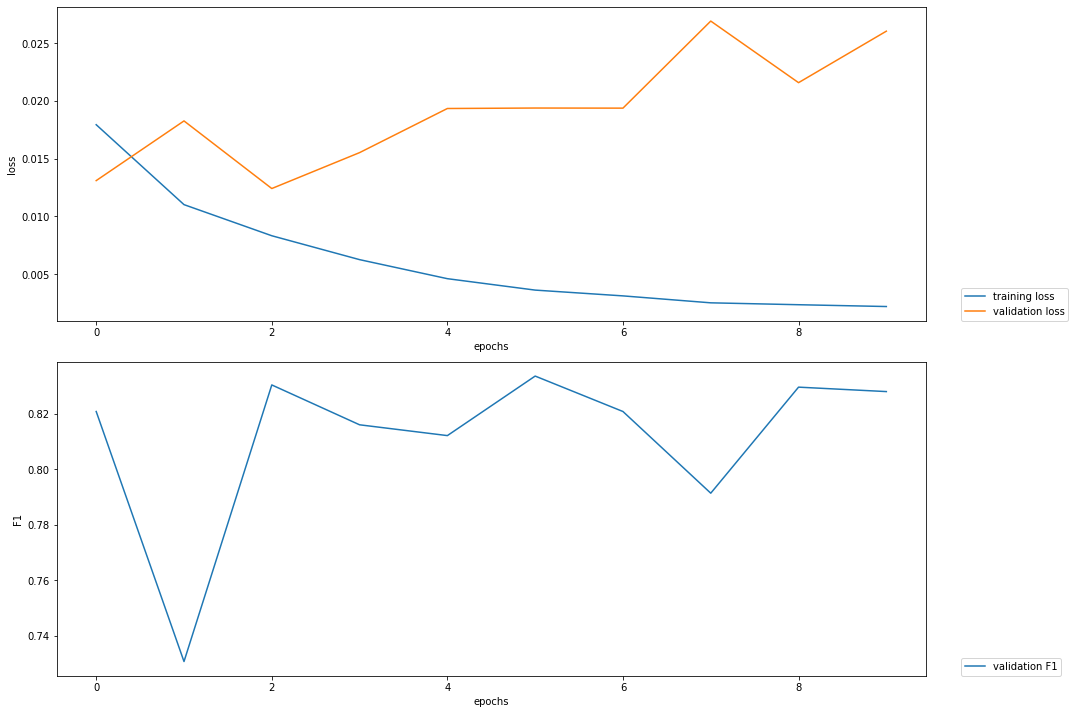

Weights plots are saved in data/weights.png


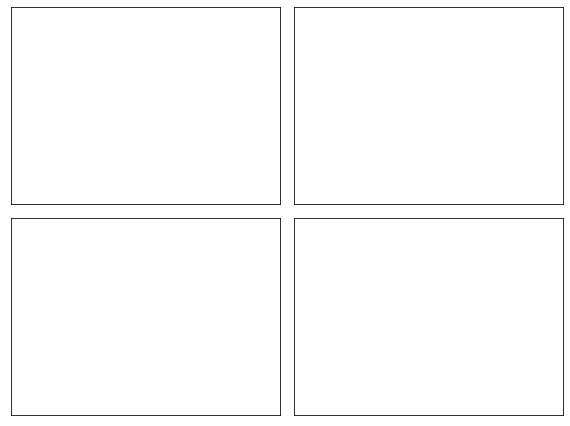

In [24]:
plotter = Plotter()
plotter.plot_training_curves('data/loss.tsv')
plotter.plot_weights('data/weights.txt')